# Exploration

Exploration of the python generated data

In [20]:
import h5py
import numpy as np
from matplotlib import pyplot as plt
import os
plt.style.use('dark_background')

In [23]:
PATH = '/home/antoine/Documents/Code/DL4FLI/TPSFsimulation_FLIM/python/dataset/data.h5'
f = h5py.File(PATH,'r') 
tpsfD = np.array(f.get('sigD'))
tpsfD_nn = np.array(f.get('sigD_nn'))
t1 = np.array(f.get('t1'))
t2 = np.array(f.get('t2'))
tR = np.array(f.get('rT'))
I = np.array(f.get('intensity'))
f.close()
print(tpsfD.shape)
print(tpsfD_nn.shape)
from skimage.metrics import structural_similarity as ssim


(300, 28, 28, 160)
(300, 28, 28, 160)


# Visualisation des 5 images générées

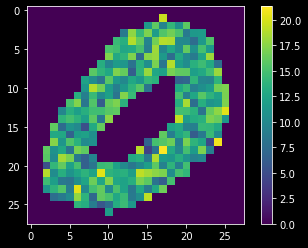

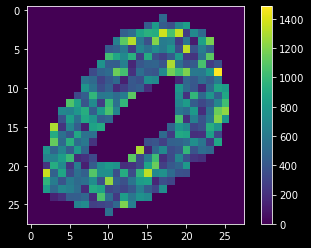

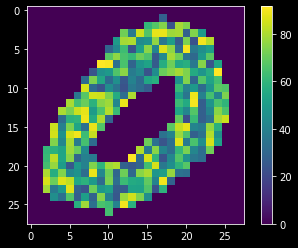

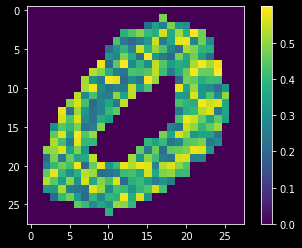

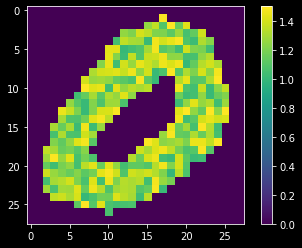

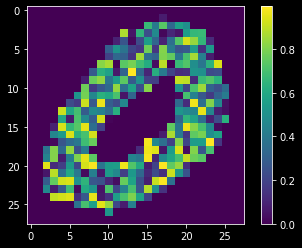

In [29]:
nb = 50
plt.imshow(tpsfD[nb].sum(axis = 2))
plt.colorbar()
plt.figure()
plt.imshow(tpsfD_nn[nb].sum(axis = 2))
plt.colorbar()
plt.figure()
plt.imshow(I[nb])
plt.colorbar()
plt.figure()
plt.imshow(t1[nb])
plt.colorbar()
plt.figure()
plt.imshow(t2[nb])
plt.colorbar()
plt.figure()
plt.imshow(tR[nb])
plt.colorbar()

# Correlaion avec ma méthodes de généartions de données

In [31]:
from scipy.stats import exponnorm
import sys
sigma = 0.01 / 2.3548 # https://fr.wikipedia.org/wiki/Fonction_gaussienne

X = []
bins = np.linspace(start = 0, stop = 161*0.075, num = 161, endpoint=False)
for img_flim, img_tau1, img_tau2, img_ratio in zip(tpsfD_nn, t1, t2, tR):
    for x in range(28):
        for y in range(28):
            if img_flim[x,y].sum() > 0:
                data1 = exponnorm.rvs(loc = 2, scale = sigma, K = img_tau1[x,y]/(sigma), size = int(img_flim[x,y].sum()))
                data2 = exponnorm.rvs(loc = 2, scale = sigma, K = img_tau2[x,y]/(sigma), size = int(img_flim[x,y].sum()))
                X1,_ = np.histogram(data1, bins)
                X1 = np.array(X1)
                X2, _ = np.histogram(data2, bins)
                X2 = np.array(X2)
                res = X1 * img_ratio[x,y] + X2 * (1-img_ratio[x,y])
                X.append(res/res.max())
            else:
                X.append(np.zeros(160))
X = np.reshape(X,[300,28,28,160])

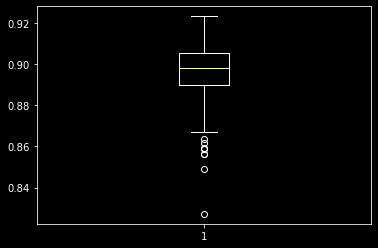

In [32]:
score = []
for nb in range(300):
    score.append(ssim(X[nb].sum(axis = 2), tpsfD[nb].sum(axis = 2)))
_ = plt.boxplot(score)

In [33]:
score = []

for my_flim, their_flim in zip(X, tpsfD):
    for x in range(28):
        for y in range(28):
            if their_flim[x,y].sum() > 0:
                score.append(np.corrcoef(their_flim[x,y], my_flim[x,y])[0,1])
#_ = plt.boxplot(score)

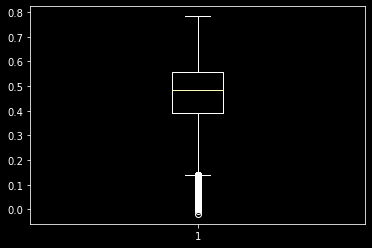

In [34]:
_ = plt.boxplot(score)